# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_weather["coord"]["lat"], 
                          "Lng": city_weather["coord"]["lon"], 
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"],
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"],
                          "Date": time.ctime(city_weather["dt"])})

    # If an error is experienced, skip the city
    except:
     print("City not found. Skipping...")
     pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | semirom
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ahau
City not found. Skipping...
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | scarborough
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | alfeld
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ta'if
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | songea
Processing Record 21 of Set 1 | codrington
Processing Record 22 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,semirom,31.4167,51.5667,17.37,54,40,1.78,IR,Tue Aug 8 21:56:16 2023
1,yellowknife,62.4560,-114.3525,20.29,45,75,5.66,CA,Tue Aug 8 21:56:16 2023
2,waitangi,-43.9535,-176.5597,9.34,82,100,1.34,NZ,Tue Aug 8 21:56:16 2023
3,ushuaia,-54.8000,-68.3000,1.81,75,0,1.54,AR,Tue Aug 8 21:51:25 2023
4,iqaluit,63.7506,-68.5145,4.85,86,20,4.12,CA,Tue Aug 8 21:53:05 2023


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,semirom,31.4167,51.5667,17.37,54,40,1.78,IR,Tue Aug 8 21:56:16 2023
1,yellowknife,62.4560,-114.3525,20.29,45,75,5.66,CA,Tue Aug 8 21:56:16 2023
2,waitangi,-43.9535,-176.5597,9.34,82,100,1.34,NZ,Tue Aug 8 21:56:16 2023
3,ushuaia,-54.8000,-68.3000,1.81,75,0,1.54,AR,Tue Aug 8 21:51:25 2023
4,iqaluit,63.7506,-68.5145,4.85,86,20,4.12,CA,Tue Aug 8 21:53:05 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

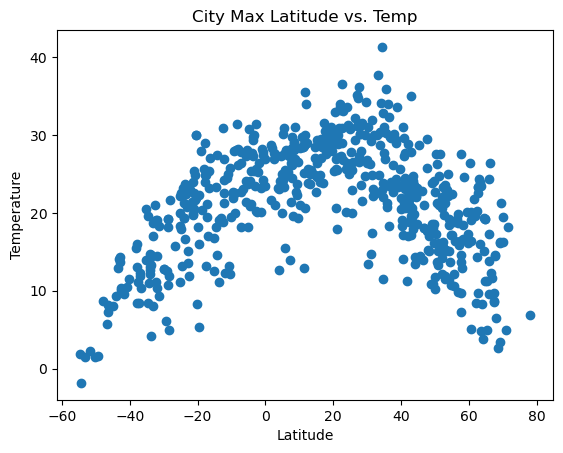

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Temperature')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

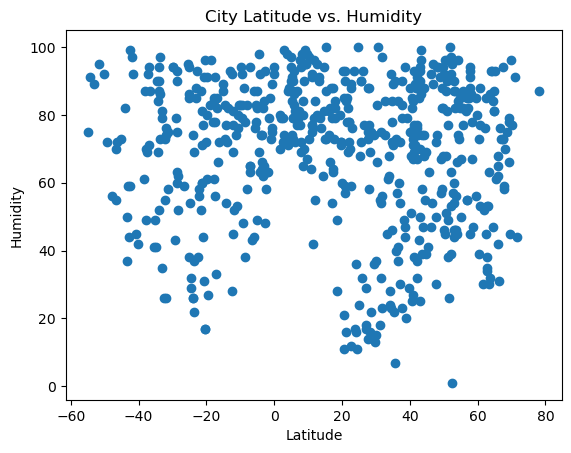

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

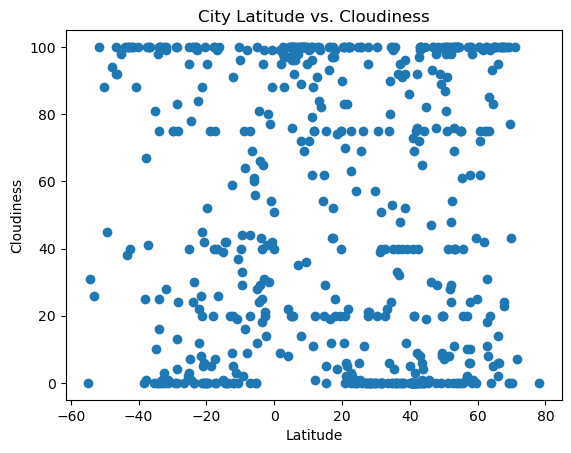

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

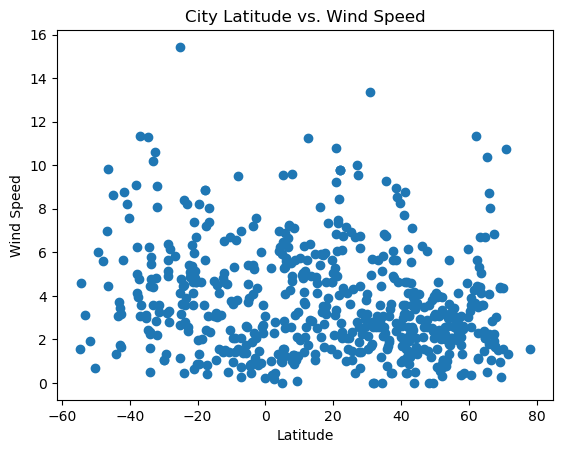

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regression_values = x_values * slope + intercept

#Make string for line equation
equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,semirom,31.4167,51.5667,17.37,54,40,1.78,IR,Tue Aug 8 21:56:16 2023
1,yellowknife,62.4560,-114.3525,20.29,45,75,5.66,CA,Tue Aug 8 21:56:16 2023
4,iqaluit,63.7506,-68.5145,4.85,86,20,4.12,CA,Tue Aug 8 21:53:05 2023
5,albany,42.6001,-73.9662,20.45,85,97,2.24,US,Tue Aug 8 21:56:17 2023
6,scarborough,54.2797,-0.4044,11.48,84,100,1.34,GB,Tue Aug 8 21:53:31 2023


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,9.34,82,100,1.34,NZ,Tue Aug 8 21:56:16 2023
3,ushuaia,-54.8000,-68.3000,1.81,75,0,1.54,AR,Tue Aug 8 21:51:25 2023
10,adamstown,-25.0660,-130.1015,22.23,85,95,15.43,PN,Tue Aug 8 21:56:20 2023
11,puerto natales,-51.7236,-72.4875,2.26,95,100,1.91,CL,Tue Aug 8 21:56:20 2023
12,edinburgh of the seven seas,-37.0676,-12.3116,12.29,71,100,11.32,SH,Tue Aug 8 21:53:08 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.358327059107758


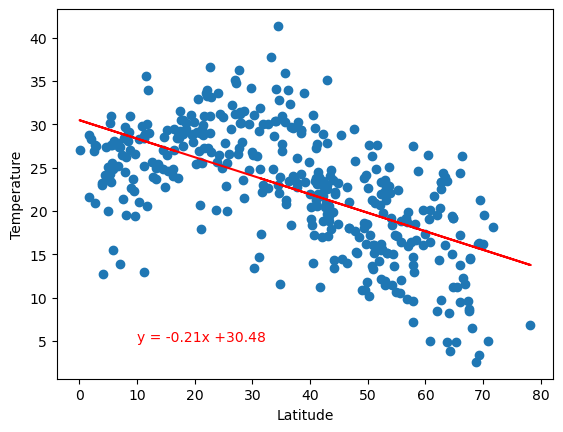

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(equation,(10,5),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (188,) and (398,)

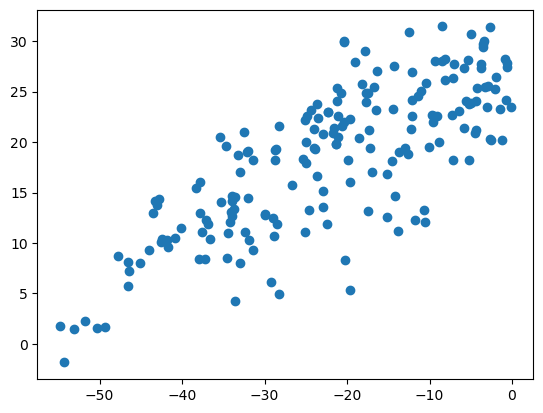

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Add plot additions
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(equation,(10,8),fontsize=20,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.358327059107758


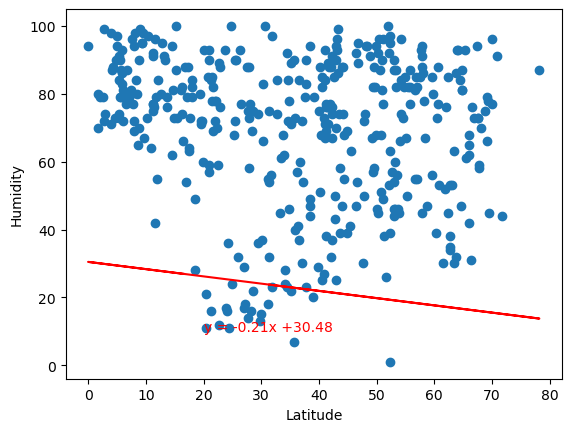

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(equation,(20,10),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (188,) and (398,)

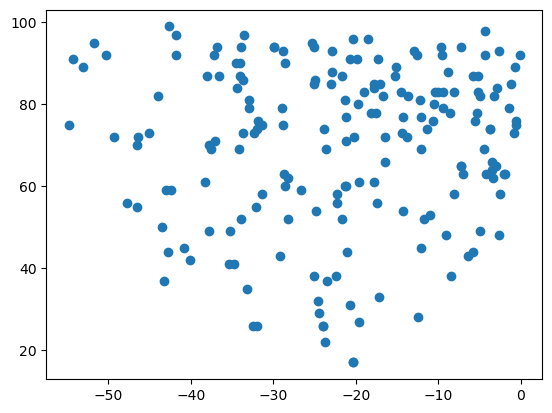

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(equation,(20,10),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.358327059107758


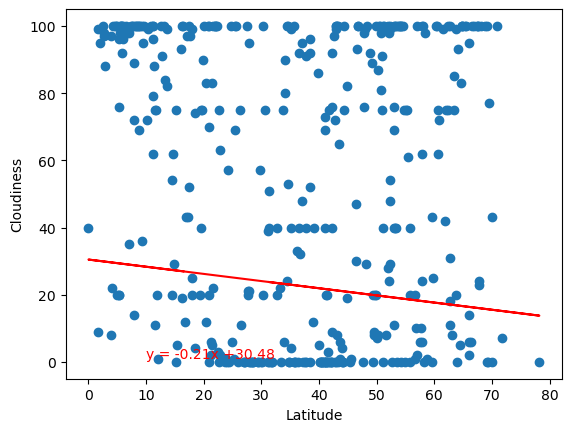

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Add plot additions
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(equation,(10,1),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (188,) and (398,)

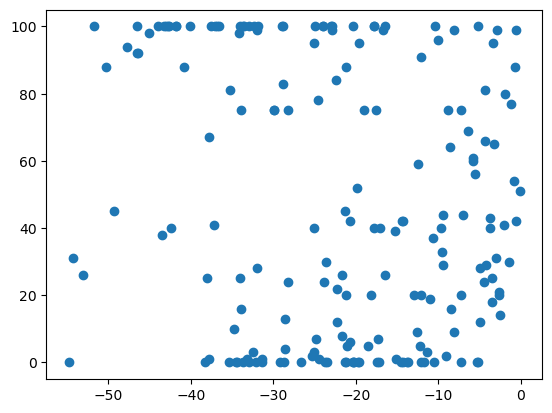

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Add plot additions
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(equation,(10,1),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.358327059107758


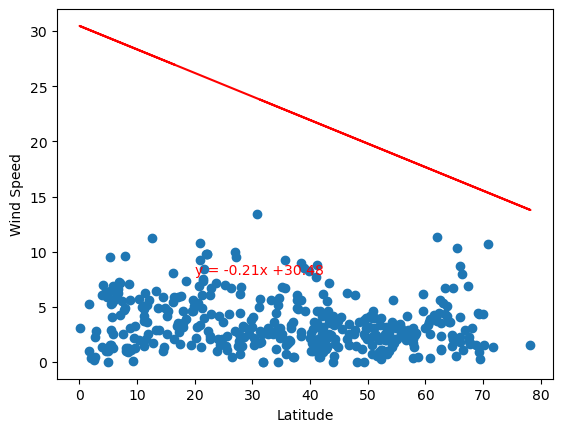

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Add plot additions
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(equation,(20,8),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (188,) and (398,)

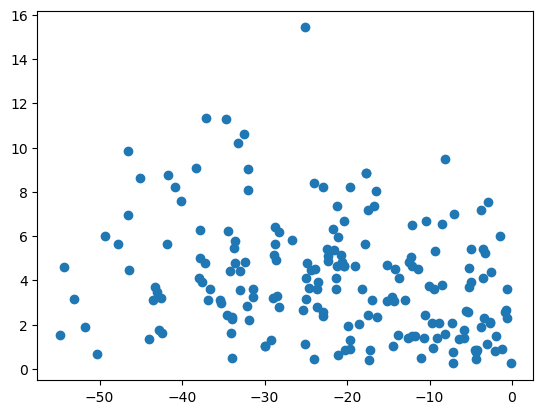

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")

# Add plot additions
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(equation,(20,8),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE